## Classification

Datasets used :
- PoetryFoundationData.csv
- Poem_classification
- topics folder

Might be complicated to merge these datasets cause first one is multi label, second one contains 4 very large classes, and last one more than 100 very specific classes.

For multiclass classification, **Poem_classification** and **topics folder**:
- study data
- treatment to apply : remove \n ? remove punctuation ? remove poems with length < n ? lemmatization ?
- tokenizer : train own ? nltk ?
- embedding : countvectorizer ? tf-idf ? gensim ? word2vec ? own features ?
- Logistic Regression (might test other multiclass models)

For multilabel classification, **PoetryFoundationData.csv**:
- same as before
- vectorize labels
- https://www.linkedin.com/pulse/algorithms-multiclass-classification-amir-hossein-takbiri/

In [45]:
import pandas as pd
import numpy as np
import os
import string
import matplotlib.pyplot as plt
import statistics
import gensim

from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

#### Poem_classification - test/train_data.csv

In [3]:
tmp1 = pd.read_csv("../data_raw/Poem_classification - test_data.csv")
tmp2 = pd.read_csv("../data_raw/Poem_classification - train_data.csv")

df_Poem_classification = pd.concat([tmp1, tmp2], ignore_index=True)
df_Poem_classification.rename(columns={"Genre": "labels", "Poem": "poem"}, inplace=True)
df_Poem_classification = df_Poem_classification[["poem", "labels"]]

classes = np.unique(df_Poem_classification["labels"], return_counts=True)
for i in range(len(classes)):
    print(f"{classes[0][i]} : {classes[1][i]} samples")

Affection : 241 samples
Death : 247 samples


In [3]:
print(df_Poem_classification.head()["poem"][0])

A woman walks by the bench I’m sitting onwith her dog that looks part Lab, part Buick,stops and asks if I would like to dance.I smile, tell her of course I do. We decideon a waltz that she begins to hum.


I tried to do a script which checks if each word is in the vocabulary from the nltk **brown** corpus, and if not split it with the most probable tokens but it didn't work that well.

#### topics folder

In [46]:
topics = os.listdir("../data_raw/topics")
df_topics_list = []
for topic in topics:
    files = os.listdir(f"../data_raw/topics/{topic}")
    df_topic = pd.DataFrame(columns=["poem", "labels"])
    i = 0
    for filename in files:
        with open(f"../data_raw/topics/{topic}/{filename}", encoding="utf8") as f:
            df_topic.loc[i] = {"poem": f.read(), "labels": topic}
        i += 1
    df_topics_list.append(df_topic)

df_topics = pd.concat(df_topics_list, ignore_index=True)

In [47]:
classes = np.unique(df_topics["labels"], return_counts=True)
print(f"Number of classes : {len(classes[1])}\n")
for i in range(len(classes[0])):
    print(f"{classes[0][i]} : {classes[1][i]} samples")

Number of classes : 144

alone : 100 samples
america : 100 samples
angel : 100 samples
anger : 98 samples
animal : 100 samples
baby : 100 samples
beach : 100 samples
beautiful : 100 samples
beauty : 100 samples
believe : 99 samples
birth : 100 samples
brother : 100 samples
butterfly : 100 samples
car : 98 samples
carpe diem : 99 samples
change : 99 samples
chicago : 98 samples
childhood : 99 samples
children : 100 samples
christmas : 100 samples
cinderella : 100 samples
city : 99 samples
courage : 98 samples
crazy : 100 samples
culture : 99 samples
dance : 100 samples
dark : 100 samples
daughter : 98 samples
death : 100 samples
depression : 99 samples
despair : 99 samples
destiny : 100 samples
dream : 100 samples
evil : 99 samples
faith : 99 samples
family : 100 samples
father : 99 samples
fear : 99 samples
fire : 100 samples
food : 100 samples
football : 99 samples
freedom : 99 samples
friend : 100 samples
frog : 100 samples
funeral : 99 samples
funny : 100 samples
future : 100 sample

As we can see, we have a really nice distributed number of sample for each one of the 144 different classes.

In [48]:
stop_words = stopwords.words("english")

In [49]:
test_string = df_topics.head()["poem"][0].replace("\n", " ").lower()

print(test_string)
print(" ".join([word for word in test_string.split() if word not in stop_words]))

loneliness his childhood warms him up loneliness he warms up to his childhood loneliness childhood his heaven loneliness his childhood a repository of warmth meditation my heart on a sea of sublimity so lonely a poem helps fill out the emptiness loneiness the world a graveyard so lonely i cheer up myself writing a poem about loneliness so lonely i write a poem  to fill out the emptiness
loneliness childhood warms loneliness warms childhood loneliness childhood heaven loneliness childhood repository warmth meditation heart sea sublimity lonely poem helps fill emptiness loneiness world graveyard lonely cheer writing poem loneliness lonely write poem fill emptiness


In [50]:
print(df_topics.iloc[0]["poem"].translate(str.maketrans('', '', string.punctuation)))

loneliness
his childhood
warms him up
loneliness
he warms up to
his childhood
loneliness
childhood
his heaven
loneliness
his childhood
a repository of warmth
meditation
my heart on
a sea of sublimity
so lonely
a poem helps fill out
the emptiness
loneiness
the world
a graveyard
so lonely
i cheer up myself
writing a poem about loneliness
so lonely
i write a poem  to fill out
the emptiness


In [51]:
# only very few last lines of poems are not part of it, i.e. written by
for i in range(100, 200):
    print(i)
    print(df_topics.iloc[i]["poem"].split("\n")[-1])

100
Ha...America!
101
---Cheung Shun Sang=Cauchy3---
102
Only after Swamiji’s lectures.
103
Of all its pow'r disarms!
104
collecting dollars from passing automobiles.
105
Which sees and says: more: more and more: always more.
106
''God mend thine every flaw''.
107
This is eternal death, and this the torment long foretold.'
108
Site in 1965 by Johnson.
109
And can guide the world as a whole towards peace and prosperity in the real sense
110
Where the air is full of sunlight and the flag is full of stars.
111
As he subdued the empire of the heart.
112
We pray, in faith, thy triumph may be brief!
113
Viva America!
114
who had a different dream.
115
(I’m actually too optimistic to believe this or let it worry me……! ! !)
116
Watching us as we fight for peace both night, and day.
117
with all it has to face.
118
Can, and does live.
119
America will always be my land.
120
cherish America
121
Like priceless treasures sinking in the sand.
122
Be thou thyself, and thyself alone, as heaven hath p

In [52]:
df = df_topics
df["poem"] = df["poem"].str.replace("\n", " ").str.lower().str.translate(str.maketrans('', '', string.punctuation + "‘’")).replace("\d+",  "", regex=True)
df["poem"] = df["poem"].apply(lambda poem: " ".join([word for word in poem.split() if word not in stop_words]))
print(len(df))

14334


In [53]:
df = df[df["poem"].str.len() > 20].reset_index(drop=True)
print(df)

                                                    poem labels
0      loneliness childhood warms loneliness warms ch...  alone
1      sit chair alone people thought friends sit tog...  alone
2      tell way must face life alone sanctuaries thou...  alone
3      debtor mercy alone covenant mercy sing fear th...  alone
4      year passed since left home life become lonely...  alone
...                                                  ...    ...
14292  may roam world like child feast sips sweet fli...  world
14293  born world everyone laughed cried conduct mann...  world
14294  cast look around world marvel see hear ponder ...  world
14295  world take good notice silver stars fading mil...  world
14296  world face beloved suddenly poured gone world ...  world

[14297 rows x 2 columns]


In [54]:
"""
আমাদের মেসে ইমদাদ হক ফুটবল খেলোয়াড় হাতে পায়ে মুখে শত আঘাতের ক্ষতে খ্যাতি লেখা তার। সন্ধ্যা বেলায় দেখিবে তাহারে পটি বাঁধি পায়ে হাতে মালিশ মাখিছে প্রতি গিঠে গিঠে কাত হয়ে বিছানাতে। মেসের চাকর হয় লবেজান সেঁক দিতে ভাঙ্গা হাড়ে সারা রাত শুধু ছটফট করে কেঁদে কেঁদে ডাক ছাড়ে। আমরা তো ভাবি ছমাসের তরে পঙ্গু সে হল হায় ফুটবলটিমে বল লয়ে কভু দেখিতে পাব না তায়। প্রভাত বেলায় খবর লইতে ছুটে যাই তার ঘরে বিছানা তাহার শূন্য পড়িয়া ভাঙা খাটিয়ার পরে। টেবিলের পরে ছোট বড় যত মালিশের শিশিগুলি উপহাস যেন করিতেছে মোরে ছিপি পরা দাঁত তুলি। সন্ধ্যা বেলায় খেলার মাঠেতে চেয়ে দেখি বিস্ময়ে মোদের মেসের ইমদাদ হক আগে ছোটে বল লয়ে বাপ পায়ে বল ড্রিবলিং করে ডান পায়ে মারে ঠেলা ভাঙা কয়খানা হাতে পায়ে তার বজ্র করিছে খেলা। চালাও চালাও আরও আগে যাও বাতাসের মত ধাও মারো জোরে মারো গোলের ভেতরে বলেরে ছুঁড়িয়া দাও। গোলগোলগোল চারিদিক হতে ওঠে কোলাহলকল জীবনের পণ মরণের পণ সব বাঁধা পায়ে দল। গোলগোলগোলমোদের মেসের ইমদাদ হক কাজি ভাঙা দুটি পায়ে জয়ের ভাগ্য লুটিয়া আনিল আজি। দর্শকদল ফিরিয়া চলেছে মহাকলবর করে ইমদাদ হক খোড়াতে খোড়াতে আসে যে মেসের ঘরে। মেসের চাকর হয়রান হয় পায়েতে মালিশ মাখি বেঘুম রাত্র কেটে যায় তার চীৎকার করি ডাকি। সকালে সকালে দৈনিক খুলি মহাআনন্দে পড়ে ইমদাদ হক কাল যা খেলেছে কমই তা নজরে পড়ে।
ଖୋଲା ଆକାଶ ତଳେ ଖରା ବର୍ଷା ଶୀତକୁଆଲିଗଂନ କରି ଝାଳ ବୁହାଇ ଚାଲେ ବଞ୍ଚିବାର କିଛି ସ୍ଵପ୍ନ ନେଇ କାରଣ କିଛି ଦାନା ପେଟ ପାଇଁ ଜୀବନର ଲକ୍ଷ୍ୟ ସେଇ ତଥାପି ସେ ବଞ୍ଚେ ହସି ହସି ଗ୍ରହଣ କରେ ପରିସ୍ଥିର ସମସ୍ତ ଦେୟ ନ ଥାଏ କାହା ପ୍ରତି କେବେ ହେୟ ଅବା କିଛି ଲୁଟି ହୋଇ ଯିବାର ଭୟ ଅଥବା ଅନ୍ୟକୁ ଠେଲି ଆଗକୁ ବଢି ଯିବାର ଶ୍ରେୟ କାରଣ ସେ ତ ଗରିବ ଏହା ହିଁ ତାର ପରିଚୟ ନିତୀ ଆସେ ଅର୍ଥ ଆସେ ଗରିବିର ମୂଳ ଉପ୍ତଡନ ସକାଶେ ବିଶ୍ଳେଷଣ ହୁଏ ବାରମ୍ବାର ମନୀଷୀଙ୍କ ପାସେ ଲେଖା ହୁଏ ପୋଥି ସବୁଗରିବର ଉତ୍ ଥାନ ସକାଶେ ହେଇଛି କି କାର୍ଯ୍ୟକ୍ଷମ ମନ ମଧେ ପ୍ରଶ୍ନ ଆସେ କାରଣ ଗରିବଙ୍କୁ ଲୁଟି ଧନୀଙ୍କ ସଂଖ୍ୟା ବଢେ ଦିନ ମାସେ ବର୍ଷେ ଆଖ୍ୟା ହୋଇପାରେ ଗରିବ ରେଖା ତଳେ କିନ୍ତୁ ଧନୀ ସେ ମନ ଓ ହୃଦୟର ସ୍ଥଳେ ଛଡାଇ ନାହିଁ କେବେ ଅନ୍ୟଠୁ କଳବଳ କୌଶଳେ ଦେଇଛି ନିଜ ଶ୍ରମ କର୍ମ ପାଇବାକୁ ମୁକ୍ତି ଏଇ ଅଭିଶପ୍ତ ଜୀବନ ପ୍ରାଙ୍ଗଣେ ସେ ଗରିବ ନୁହେଁ ନିଜ ଇଚ୍ଛା ଯୁକ୍ତେ ପରିସ୍ଥିତି ସମାଜ ଦେଇ ନାହିଁ ବଢିବାକୁ ତା ସାଥେ ବିଚାରିବା ଆସ ଥରେ ଏଥି ପାଇଁ ଦାୟୀ ଆମେ ଅବା ଜୀଇଁବା ପ୍ରଣାଳିରେ ତୃଟି ଆମ ପାଖେ ଅଥବାଆମ ଲୋଭ ସ୍ଵାର୍ଥ ଅନ୍ୟକୁ ଲୁଟିବା ସ୍ଵଭାବେ
ଆକାଶରୁ ଆକାଶ ଗଜାନନ ମିଶ୍ର ଆକାଶରୁ ଆକାଶ ଗତି ମୋର ମୁଁ ଇ ଆକାଶ ଏଠାରେ। ଆକାଶରେ ନିଆଁ ଆକାଶରେ ପାଣି। ଉଭୟ ନିଆଁ ଓ ପାଣି ଆକାଶ। ଆକାଶକୁ ଆକାଶରେ ରଖି ମୁଁ ଛୁଟୁଛି ଦୂରରୁ ଦୂର। ଆକାଶ ଗତି ମୋର ଶାନ୍ତିର ବାର୍ତ୍ତାରେ ମୋର ବସତି। ସାରା ପୃଥିବୀ ମୋର ମୁଁ ସାରା ପୃଥିବୀର । ତପୋବନ ଟିଟିଲାଗଡ ବଲାଙ୍ଗିର କେତେ ପାଣି କିଏ ଜାଣେ ପଶିଛି କେମିତି ପାଣି ଭିତରେ ମୋ ଘର ମୁଁ ଇ ପାଣି । ବାହାରେ ଭିତରେ ଉପରେ ତଳେ ପାଣି ଆଉ ପାଣି। ପାଣିର ସମୟ ପାଣିର ଅର୍ଥ ପାଣି ଇ ପାଣି ପାଣି ପାଇଁ ଜୀବନ ପାଣି ପାଇଁ ଯୁଦ୍ଧ ପାଣି ବାହାରେ ଆଉ କିଛି ନାଇଁ। ପାଣିକୁ ପାଣିଠି ଛାଡି ଦିଆଯାଉ ଯାଉ ପାଣି ବହିଯାଉ ନଳବାଟେ ନଟୁ ପରି ଘୁରୁ ଘୁରୁ। ପୁଣି ପାଣିକୁ ପ୍ରସ୍ତୁତ କରାଯାଉ ନାନାଦି ରଙ୍ଗରେ ନାନାଦି ଚିତ୍ରରେ। ପାଣିକୁ କରାଯାଉ ଗୋଟେ ଜୋକର ଆଉ ମପା ଯାଉ ଅନ୍ଧାର ।
春日放鹅河上游 出句： 春日放鹅河上游【不正师太】 对句： 冬天赏 雪风中过【不正师太】 闲时怜柳眼中过【随玉而安】 秋云追月风中散【久牛】
ପାଣିର ସ୍ୱପ୍ନ ସ୍ୱପ୍ନରେ ପାଣି ବହୁଛି ଉଜାଣି। ଦେ ଦେ ଆଉ କେତେ ଦେ ଆଣି। ଏଥକୁ କର ଉପାୟ ପହଁରିବାର। ଏଥକୁ ଯାତ୍ରା ଅନ୍ଧାରୁ ଅନ୍ଧାର । ବାମ ଆଉ ଡାହାଣ କୁଣ୍ଡଳାକାର। ଅଂଚଳ ଅଂଚଳ ନିଶାର କଳେବର। ସହ ସହିଯାଅ ସହିବାକୁ ପଡିବ ମହାମନ୍ତ୍ରୀର ଆଦେଶ। ଯାଉଛି ଆଉଛି ଯେ ଯାଏ ନିଶ୍ୱାସପ୍ରଶ୍ୱାସ । ବ୍ୟବସ୍ଥାର ବି ଗୋଟେ ସ୍ୱର ଛନ୍ଦ ଅଛି ତ ସ୍ୱର୍ଗପ୍ରାପ୍ତି ଏଠି ଭାରି ସହଜ।
"""

# indices to remove is ids in df of the lines above, discovered when word2vec these
indices_to_remove = [3992, 9431, 11216, 12517, 12604]
df = df.drop(indices_to_remove).reset_index(drop=True)
print(df)

                                                    poem labels
0      loneliness childhood warms loneliness warms ch...  alone
1      sit chair alone people thought friends sit tog...  alone
2      tell way must face life alone sanctuaries thou...  alone
3      debtor mercy alone covenant mercy sing fear th...  alone
4      year passed since left home life become lonely...  alone
...                                                  ...    ...
14287  may roam world like child feast sips sweet fli...  world
14288  born world everyone laughed cried conduct mann...  world
14289  cast look around world marvel see hear ponder ...  world
14290  world take good notice silver stars fading mil...  world
14291  world face beloved suddenly poured gone world ...  world

[14292 rows x 2 columns]


In [55]:
df["poem"] = df["poem"].apply(lambda poem : ''.join([i if ord(i) < 128 else ' ' for i in poem])) # remove non ascii chars
df["poem"] = df["poem"].apply(lambda poem : ' '.join([w if len(w) != 1 else '' for w in poem.split()])) # remove single char words

In [ ]:
df['poem'].replace('', np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True)

In [68]:
df.to_csv("cleaned_classification.csv")

### Data analysis

In [11]:
text_df = pd.DataFrame(df["labels"])
text_df['len'] = df["poem"].apply(len)
print("Mean length of poems (in characters) : ", int(text_df['len'].mean()))
print("Min length of poems (in characters) : ", text_df['len'].min())
print("Max length of poems (in characters) : ", text_df['len'].max())

Mean length of poems (in characters) :  636
Min length of poems (in characters) :  21
Max length of poems (in characters) :  44594


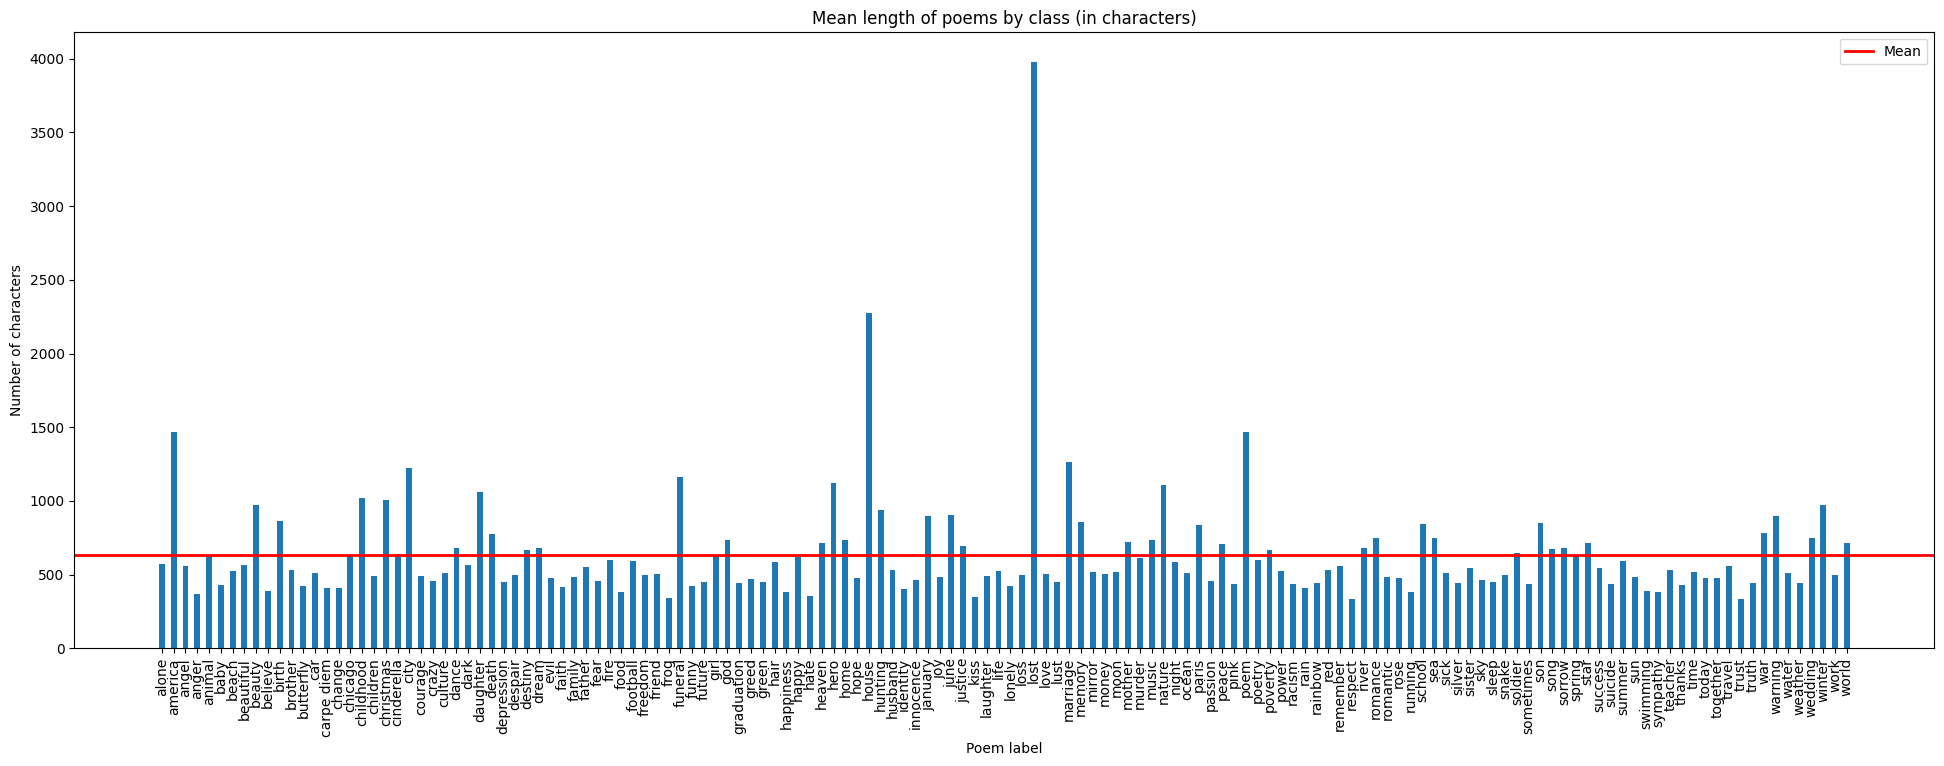

In [12]:
df_mean_length = text_df.groupby('labels').mean().reset_index()

plt.figure(figsize=(24, 8))
plt.bar(x=df_mean_length["labels"], height=df_mean_length["len"], width=0.5)

plt.xlabel('Poem label')
plt.ylabel('Number of characters')
plt.title('Mean length of poems by class (in characters)')
plt.axhline(y=int(text_df['len'].mean()), color='r', linestyle='-', linewidth=2, label='Mean')
plt.legend()

plt.xticks(rotation=90)

plt.show()

Since almost all classes have poems of same length, it won't be an useful feature to use.

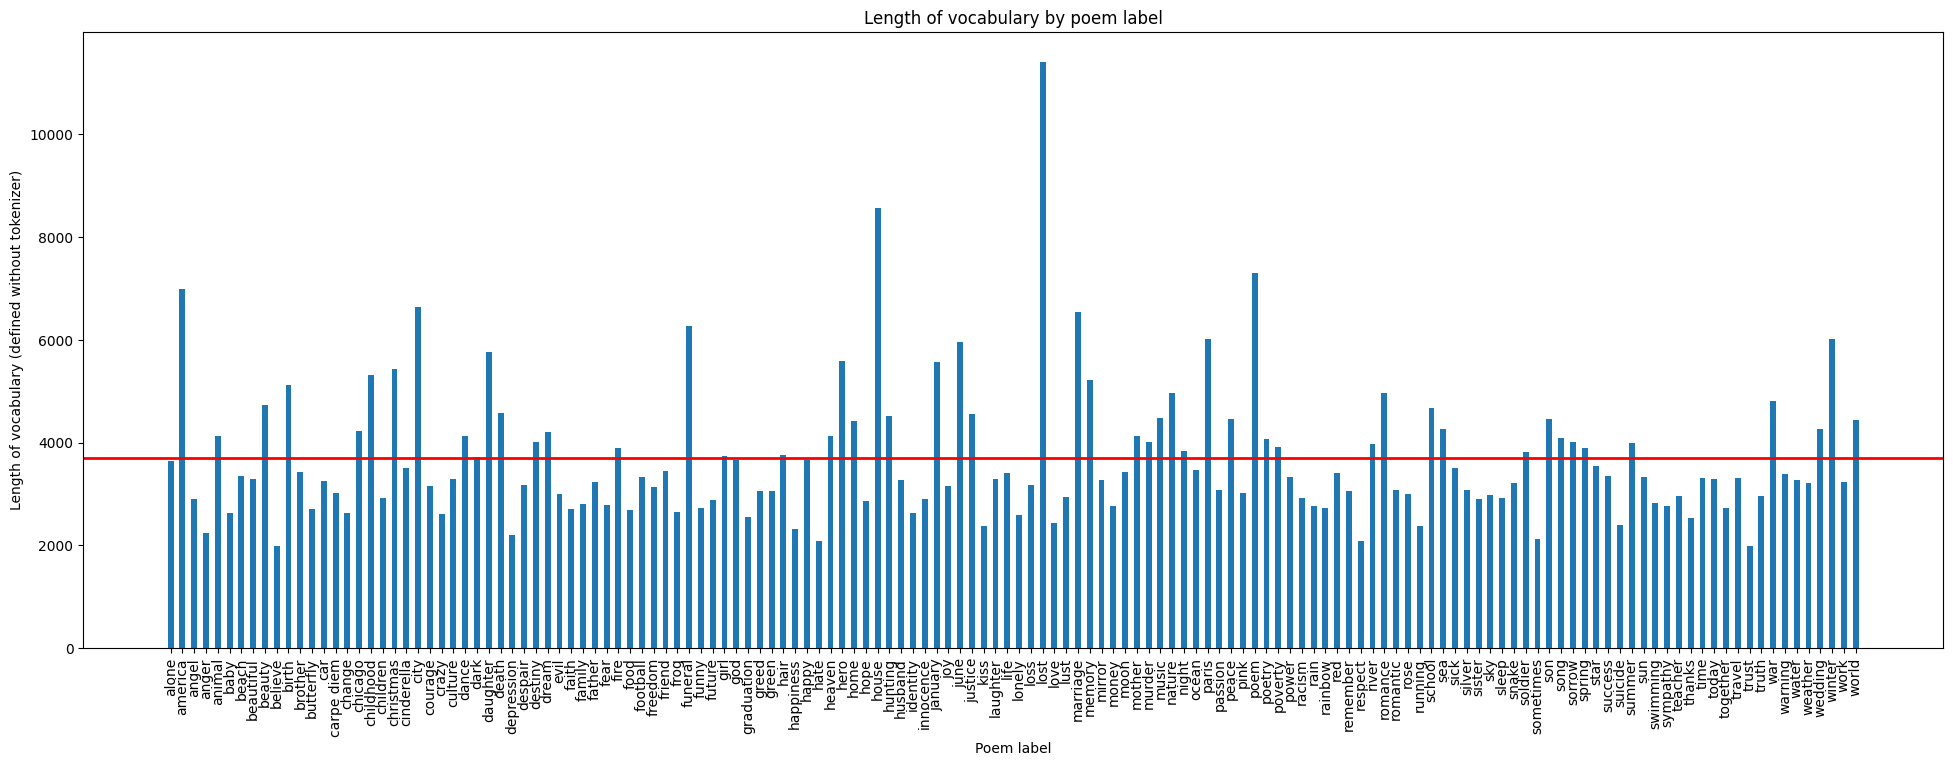

In [13]:
vocab_length_by_label = []
most_occuring_words_by_label = []
labels = np.unique(df["labels"])
for label in labels:
    voc_tmp = " ".join(list(df[df["labels"] == label]["poem"])).split()
    vocab_length_by_label.append(len(set(voc_tmp)))
    u, count = np.unique(voc_tmp, return_counts=True)
    count_sort_ind = np.argsort(-count)
    most_occuring_words_by_label.append((u[count_sort_ind][:5], count[count_sort_ind][:5]))

plt.figure(figsize=(24, 8))
plt.bar(x=labels, height=vocab_length_by_label, width=0.5)
plt.xlabel('Poem label')
plt.ylabel('Length of vocabulary (defined without tokenizer)')
plt.title('Length of vocabulary by poem label')

plt.axhline(y=statistics.mean(vocab_length_by_label), color='r', linestyle='-', linewidth=2, label='Mean')
plt.xticks(rotation=90)

plt.show()

In [14]:
for i in range(len(labels)):
    print(f"{labels[i]} : ", end="")
    tmp = most_occuring_words_by_label[i]
    for i in range(5):
        print(f"{tmp[1][i]} occurence(s) of {tmp[0][i]}", end=", ")
    print()
    

alone : 319 occurence(s) of alone, 89 occurence(s) of one, 62 occurence(s) of love, 53 occurence(s) of like, 38 occurence(s) of know, 
america : 1205 occurence(s) of america, 101 occurence(s) of like, 98 occurence(s) of thy, 91 occurence(s) of one, 91 occurence(s) of land, 
angel : 319 occurence(s) of angel, 116 occurence(s) of love, 71 occurence(s) of like, 66 occurence(s) of know, 62 occurence(s) of one, 
anger : 380 occurence(s) of anger, 49 occurence(s) of like, 45 occurence(s) of dont, 37 occurence(s) of away, 36 occurence(s) of angry, 
animal : 143 occurence(s) of animal, 98 occurence(s) of like, 85 occurence(s) of one, 63 occurence(s) of animals, 46 occurence(s) of us, 
baby : 263 occurence(s) of baby, 83 occurence(s) of love, 55 occurence(s) of little, 52 occurence(s) of like, 46 occurence(s) of heart, 
beach : 170 occurence(s) of beach, 90 occurence(s) of sea, 77 occurence(s) of love, 63 occurence(s) of sand, 58 occurence(s) of like, 
beautiful : 275 occurence(s) of beautiful,

As we can see, there is a lot of diversity in the most used words for each category, so a CountVectorizer might be a good start for embedding.

## Logistic Regression

### CountVectorizer

In [34]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['poem'])

In [35]:
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LogisticRegression(multi_class="multinomial", max_iter=1000, random_state=42, solver='saga')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42,
                   solver='saga')

In [39]:
y_pred = model.predict(X_test)

print(f"Classification Report:\n{classification_report(y_test, y_pred, digits=4)}")

Classification Report:
              precision    recall  f1-score   support

       alone     0.3333    0.3810    0.3556        21
     america     0.5500    0.5238    0.5366        21
       angel     0.4375    0.7000    0.5385        20
       anger     0.7895    0.6818    0.7317        22
      animal     0.7778    0.2800    0.4118        25
        baby     0.8000    0.2105    0.3333        19
       beach     1.0000    0.2667    0.4211        15
   beautiful     0.6000    0.4800    0.5333        25
      beauty     0.1875    0.5625    0.2812        16
     believe     0.4651    0.9091    0.6154        22
       birth     0.1667    0.0476    0.0741        21
     brother     0.8182    0.5625    0.6667        16
   butterfly     0.6667    0.6000    0.6316        20
         car     0.7857    0.5000    0.6111        22
  carpe diem     1.0000    0.1250    0.2222        24
      change     0.5000    0.2222    0.3077        18
     chicago     1.0000    0.2917    0.4516        24
   c

Very bad result, might try with lemmatization.

In [34]:
lemmatizer = WordNetLemmatizer()
df["poem"] = df["poem"].apply(lambda poem: " ".join([lemmatizer.lemmatize(word) for word in poem.split()]))

C:\Users\mael\AppData\Local\Temp\ipykernel_3760\80727599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["poem"] = df["poem"].apply(lambda poem: " ".join([lemmatizer.lemmatize(word) for word in poem.split()]))


In [38]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['poem'])

In [39]:
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = LogisticRegression(multi_class="multinomial", max_iter=1000, random_state=42, solver='saga')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [41]:
y_pred = model.predict(X_test)

print(f"Classification Report:\n{classification_report(y_test, y_pred, digits=4)}")

Classification Report:
              precision    recall  f1-score   support

       alone     0.2500    0.1905    0.2162        21
     america     0.6000    0.2857    0.3871        21
       angel     0.5000    0.5000    0.5000        20
       anger     0.6818    0.6818    0.6818        22
      animal     0.5652    0.5200    0.5417        25
        baby     0.5000    0.4737    0.4865        19
       beach     0.4444    0.5333    0.4848        15
   beautiful     0.4167    0.4000    0.4082        25
      beauty     0.2692    0.4375    0.3333        16
     believe     0.7727    0.7727    0.7727        22
       birth     0.2308    0.1429    0.1765        21
     brother     0.3750    0.3750    0.3750        16
   butterfly     0.6667    0.6000    0.6316        20
         car     0.6190    0.5909    0.6047        22
  carpe diem     0.5000    0.5417    0.5200        24
      change     0.4615    0.3333    0.3871        18
     chicago     0.6875    0.4583    0.5500        24
   c

In [9]:
X = df['poem']
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = make_pipeline(CountVectorizer(tokenizer=word_tokenize), LogisticRegression(max_iter=1000, random_state=42, multi_class="multinomial", solver='saga'))
model.fit(X_train, y_train)

c:\Users\mael\Desktop\workspace\NLP1_Project\.venv\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


: 

In [13]:
y_pred = model.predict(X_test)

print(f"Classification Report:\n{classification_report(y_test, y_pred, digits=4)}")

Classification Report:
              precision    recall  f1-score   support

       alone     0.3333    0.2381    0.2778        21
     america     0.5714    0.3810    0.4571        21
       angel     0.6000    0.6000    0.6000        20
       anger     0.7143    0.6818    0.6977        22
      animal     0.5833    0.5600    0.5714        25
        baby     0.5333    0.4211    0.4706        19
       beach     0.5000    0.5333    0.5161        15
   beautiful     0.4286    0.4800    0.4528        25
      beauty     0.3182    0.4375    0.3684        16
     believe     0.6667    0.7273    0.6957        22
       birth     0.2857    0.1905    0.2286        21
     brother     0.5000    0.5000    0.5000        16
   butterfly     0.7059    0.6000    0.6486        20
         car     0.7368    0.6364    0.6829        22
  carpe diem     0.5833    0.5833    0.5833        24
      change     0.5000    0.3889    0.4375        18
     chicago     0.6875    0.4583    0.5500        24
   c

### tf-idf

In [45]:
X = df['poem']
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = make_pipeline(TfidfVectorizer(), LogisticRegression(multi_class="multinomial", max_iter=1000, solver="saga", random_state=42))
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, multi_class='multinomial',
                                    solver='saga'))])

In [51]:
y_pred = model.predict(X_test)

print(f"Classification Report:\n{classification_report(y_test, y_pred, digits=4)}")

Classification Report:
              precision    recall  f1-score   support

       alone     0.6000    0.2857    0.3871        21
     america     0.7500    0.5714    0.6486        21
       angel     0.5200    0.6500    0.5778        20
       anger     0.8500    0.7727    0.8095        22
      animal     0.6667    0.7200    0.6923        25
        baby     0.6316    0.6316    0.6316        19
       beach     0.4444    0.5333    0.4848        15
   beautiful     0.4615    0.4800    0.4706        25
      beauty     0.2593    0.4375    0.3256        16
     believe     0.8696    0.9091    0.8889        22
       birth     0.2143    0.1429    0.1714        21
     brother     0.5294    0.5625    0.5455        16
   butterfly     0.7368    0.7000    0.7179        20
         car     0.6957    0.7273    0.7111        22
  carpe diem     0.7895    0.6250    0.6977        24
      change     0.5000    0.3889    0.4375        18
     chicago     0.8571    0.5000    0.6316        24
   c

### word2vec

In [15]:
import gensim.downloader

word2vec = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


#### Above is the code to discover these weird lines

In [120]:
def transform_X(serie: pd.Series):
    X = []
    indices_to_skip = []
    i = 0
    for e in serie:
        e_w2v = np.array([word2vec[word] for word in e.split() if word in word2vec])
        if len(e_w2v) == 0:
            print(e)
            indices_to_skip.append(i)
            i += 1
            continue
        X.append(np.mean(e_w2v, axis=0))
        i += 1
    return np.array(X), indices_to_skip

X_w2v, indices_to_skip = transform_X(df["poem"])

আমাদের মেসে ইমদাদ হক ফুটবল খেলোয়াড় হাতে পায়ে মুখে শত আঘাতের ক্ষতে খ্যাতি লেখা তার। সন্ধ্যা বেলায় দেখিবে তাহারে পটি বাঁধি পায়ে হাতে মালিশ মাখিছে প্রতি গিঠে গিঠে কাত হয়ে বিছানাতে। মেসের চাকর হয় লবেজান সেঁক দিতে ভাঙ্গা হাড়ে সারা রাত শুধু ছটফট করে কেঁদে কেঁদে ডাক ছাড়ে। আমরা তো ভাবি ছমাসের তরে পঙ্গু সে হল হায় ফুটবলটিমে বল লয়ে কভু দেখিতে পাব না তায়। প্রভাত বেলায় খবর লইতে ছুটে যাই তার ঘরে বিছানা তাহার শূন্য পড়িয়া ভাঙা খাটিয়ার পরে। টেবিলের পরে ছোট বড় যত মালিশের শিশিগুলি উপহাস যেন করিতেছে মোরে ছিপি পরা দাঁত তুলি। সন্ধ্যা বেলায় খেলার মাঠেতে চেয়ে দেখি বিস্ময়ে মোদের মেসের ইমদাদ হক আগে ছোটে বল লয়ে বাপ পায়ে বল ড্রিবলিং করে ডান পায়ে মারে ঠেলা ভাঙা কয়খানা হাতে পায়ে তার বজ্র করিছে খেলা। চালাও চালাও আরও আগে যাও বাতাসের মত ধাও মারো জোরে মারো গোলের ভেতরে বলেরে ছুঁড়িয়া দাও। গোলগোলগোল চারিদিক হতে ওঠে কোলাহলকল জীবনের পণ মরণের পণ সব বাঁধা পায়ে দল। গোলগোলগোলমোদের মেসের ইমদাদ হক কাজি ভাঙা দুটি পায়ে জয়ের ভাগ্য লুটিয়া আনিল আজি। দর্শকদল ফিরিয়া চলেছে মহাকলবর করে ইমদাদ হক খোড়াতে খোড়

In [122]:
print(df["poem"][3992])

আমাদের মেসে ইমদাদ হক ফুটবল খেলোয়াড় হাতে পায়ে মুখে শত আঘাতের ক্ষতে খ্যাতি লেখা তার। সন্ধ্যা বেলায় দেখিবে তাহারে পটি বাঁধি পায়ে হাতে মালিশ মাখিছে প্রতি গিঠে গিঠে কাত হয়ে বিছানাতে। মেসের চাকর হয় লবেজান সেঁক দিতে ভাঙ্গা হাড়ে সারা রাত শুধু ছটফট করে কেঁদে কেঁদে ডাক ছাড়ে। আমরা তো ভাবি ছমাসের তরে পঙ্গু সে হল হায় ফুটবলটিমে বল লয়ে কভু দেখিতে পাব না তায়। প্রভাত বেলায় খবর লইতে ছুটে যাই তার ঘরে বিছানা তাহার শূন্য পড়িয়া ভাঙা খাটিয়ার পরে। টেবিলের পরে ছোট বড় যত মালিশের শিশিগুলি উপহাস যেন করিতেছে মোরে ছিপি পরা দাঁত তুলি। সন্ধ্যা বেলায় খেলার মাঠেতে চেয়ে দেখি বিস্ময়ে মোদের মেসের ইমদাদ হক আগে ছোটে বল লয়ে বাপ পায়ে বল ড্রিবলিং করে ডান পায়ে মারে ঠেলা ভাঙা কয়খানা হাতে পায়ে তার বজ্র করিছে খেলা। চালাও চালাও আরও আগে যাও বাতাসের মত ধাও মারো জোরে মারো গোলের ভেতরে বলেরে ছুঁড়িয়া দাও। গোলগোলগোল চারিদিক হতে ওঠে কোলাহলকল জীবনের পণ মরণের পণ সব বাঁধা পায়ে দল। গোলগোলগোলমোদের মেসের ইমদাদ হক কাজি ভাঙা দুটি পায়ে জয়ের ভাগ্য লুটিয়া আনিল আজি। দর্শকদল ফিরিয়া চলেছে মহাকলবর করে ইমদাদ হক খোড়াতে খোড়

In [121]:
print(indices_to_skip)

[3992, 9431, 11216, 12517, 12604]


In [103]:
test = np.array([word2vec[word] for word in df["poem"][9439].split() if word in word2vec])

In [94]:
print(df["poem"][9431].split())

['world', 'people', 'people', 'different', 'religion', 'religion', 'various', 'festivals', 'festivals', 'celebrated', 'joy', 'year', 'people', 'poverty', 'could', 'celebrate', 'farmers', 'produce', 'food', 'country', 'could', 'celebrate', 'people', 'buys', 'food', 'farmers', 'enjoys', 'festival', 'people', 'money', 'people', 'tradition', 'could', 'celebrate', 'sometimes', 'poverty', 'makes', 'people', 'go', 'wrong', 'way', 'somewhere', 'poverty', 'lead', 'suicide', 'makes', 'poverty', 'controlling', 'wastage', 'food', 'country', 'may', 'avoid', 'poverty', 'controlling', 'wastage', 'money', 'country', 'sometimes', 'somewhere', 'things', 'needed', 'reach', 'people', 'poverty', 'doesnt', 'reach', 'although', 'people', 'donate', 'sometimes', 'donation', 'done', 'status', 'people', 'poverty', 'fulfilled', 'since', 'poverty', 'abolished']


### back to word2vec

In [139]:
def transform_X(serie: pd.Series):
    return np.array([np.mean(np.array([word2vec[word] for word in poem.split() if word in word2vec]), axis=0) for poem in serie])

X_w2v = transform_X(df["poem"])

In [140]:
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

In [141]:
model = LogisticRegression(multi_class="multinomial", max_iter=1000, solver="saga", random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [142]:
y_pred = model.predict(X_test)

print(f"Classification Report:\n{classification_report(y_test, y_pred, digits=4)}")

Classification Report:
              precision    recall  f1-score   support

       alone     0.3000    0.1429    0.1935        21
     america     0.3077    0.3810    0.3404        21
       angel     0.4231    0.5500    0.4783        20
       anger     0.5417    0.5909    0.5652        22
      animal     0.4583    0.4400    0.4490        25
        baby     0.6429    0.4737    0.5455        19
       beach     0.2308    0.4000    0.2927        15
   beautiful     0.5000    0.2400    0.3243        25
      beauty     0.1935    0.3750    0.2553        16
     believe     0.5385    0.6364    0.5833        22
       birth     0.2000    0.0476    0.0769        21
     brother     0.3889    0.4375    0.4118        16
   butterfly     0.6316    0.6000    0.6154        20
         car     0.4333    0.5909    0.5000        22
  carpe diem     0.7857    0.4583    0.5789        24
      change     0.6000    0.3333    0.4286        18
     chicago     0.5294    0.3750    0.4390        24
   c

### With own word2vec

In [133]:
X = df['poem']
y = df['labels']

In [134]:
L = []
for v in X:
    L.append(v.split())

In [135]:
word2vec = Word2Vec(sentences=L, vector_size=500, min_count=1, workers=4)

In [136]:
def transform_X(serie: pd.Series):
    return np.array([np.mean(np.array([word2vec.wv[word] for word in poem.split() if word in word2vec.wv]), axis=0) for poem in serie])

X_w2v = transform_X(df["poem"])
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

In [138]:
model = LogisticRegression(multi_class="multinomial", max_iter=1000, solver="saga", random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga')

In [140]:
y_pred = model.predict(X_test)

print(f"Classification Report:\n{classification_report(y_test, y_pred, digits=4)}")

Classification Report:
              precision    recall  f1-score   support

       alone     0.2727    0.1429    0.1875        21
     america     0.2857    0.0952    0.1429        21
       angel     0.1667    0.3000    0.2143        20
       anger     0.3462    0.4091    0.3750        22
      animal     0.0000    0.0000    0.0000        25
        baby     0.4118    0.3684    0.3889        19
       beach     0.0968    0.2000    0.1304        15
   beautiful     0.6364    0.2800    0.3889        25
      beauty     0.1034    0.3750    0.1622        16
     believe     0.4000    0.3636    0.3810        22
       birth     0.0357    0.0476    0.0408        21
     brother     0.1304    0.1875    0.1538        16
   butterfly     0.0833    0.1000    0.0909        20
         car     0.1053    0.1818    0.1333        22
  carpe diem     0.1667    0.1250    0.1429        24
      change     0.1765    0.1667    0.1714        18
     chicago     0.1667    0.0417    0.0667        24
   c

## Naive Bayes

In [20]:
X = df['poem']
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Countvectorizer

In [99]:
model = make_pipeline(CountVectorizer(), MultinomialNB(alpha=0.08))
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=0.08))])

In [100]:
y_pred = model.predict(X_test)

print(f"Classification Report:\n{classification_report(y_test, y_pred, digits=4)}")

Classification Report:
              precision    recall  f1-score   support

       alone     0.2500    0.0952    0.1379        21
     america     0.2791    0.5714    0.3750        21
       angel     0.3333    0.4000    0.3636        20
       anger     0.7333    0.5000    0.5946        22
      animal     0.4138    0.4800    0.4444        25
        baby     0.2632    0.2632    0.2632        19
       beach     0.3684    0.4667    0.4118        15
   beautiful     0.5833    0.2800    0.3784        25
      beauty     0.1282    0.3125    0.1818        16
     believe     0.5714    0.5455    0.5581        22
       birth     0.0714    0.0952    0.0816        21
     brother     0.1875    0.1875    0.1875        16
   butterfly     0.5000    0.3500    0.4118        20
         car     0.4231    0.5000    0.4583        22
  carpe diem     0.8889    0.3333    0.4848        24
      change     0.5556    0.2778    0.3704        18
     chicago     0.5714    0.5000    0.5333        24
   c

### Tf-idf

In [29]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=2.9))
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=2.9))])

In [30]:
y_pred = model.predict(X_test)

print(f"Classification Report:\n{classification_report(y_test, y_pred, digits=4)}")

Classification Report:
              precision    recall  f1-score   support

       alone     0.5000    0.2381    0.3226        21
     america     0.7500    0.4286    0.5455        21
       angel     0.4375    0.7000    0.5385        20
       anger     0.9375    0.6818    0.7895        22
      animal     0.8182    0.3600    0.5000        25
        baby     0.5714    0.6316    0.6000        19
       beach     0.2903    0.6000    0.3913        15
   beautiful     0.7333    0.4400    0.5500        25
      beauty     0.1837    0.5625    0.2769        16
     believe     0.8571    0.8182    0.8372        22
       birth     0.5000    0.0476    0.0870        21
     brother     0.3333    0.5625    0.4186        16
   butterfly     0.7500    0.6000    0.6667        20
         car     0.7333    0.5000    0.5946        22
  carpe diem     1.0000    0.5417    0.7027        24
      change     0.5714    0.4444    0.5000        18
     chicago     0.9000    0.3750    0.5294        24
   c

c:\Users\mael\Desktop\workspace\NLP1_Project\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mael\Desktop\workspace\NLP1_Project\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mael\Desktop\workspace\NLP1_Project\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

word2vec impossible since multinomial works with discrete valus

# Test

In [69]:
df_sentiment = pd.read_csv("../data_raw/train.tsv", delimiter='\t')

In [70]:
df_sentiment

,0,with pale blue berries. in these peaceful shades--,1
0,1,"it flows so long as falls the rain,",0
1,2,"and that is why, the lonesome day,",-1
2,3,"when i peruse the conquered fame of heroes, an...",2
3,4,of inward strife for truth and liberty.,2
4,5,the red sword sealed their vows!,2
...,...,...,...
743,887,to his ears there came a murmur of far seas be...,0
744,888,"the one good man in the world who knows me, --",1
745,889,faint voices lifted shrill with pain,-1
746,890,"an', fust you knowed on, back come charles the...",0
